# Data Visualization

## References
* https://stackoverflow.com/questions/47343838/how-to-change-column-names-in-pandas-dataframe-using-a-list-of-names
* https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
* https://stackoverflow.com/questions/6557553/get-month-name-from-number
* https://stackoverflow.com/questions/19626530/python-xticks-in-subplots

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import calendar

In [2]:
# Set style
plt.style.use('bmh')

In [4]:
# Import dataset
wardrobe_df = pd.read_csv('wardrobedata.csv')
wardrobe_df.head()

,Item,Total Wears,Cost per Wear,Wears per Month,Date Acquired,Cost,Source,Repairs/Tailoring,Color,Type,...,Wears (10/2019),Wears (9/2019),Wears (8/2019),Wears (7/2019),Wears (6/2019),Wears (5/2019),Wears (4/2019),Wears (3/2019),Wears (2/2019),Wears (1/2019)
0,Brian's White Buttonup LS Shirt,5.0,0.000000,1.595745,2020-08-09,0,Secondhand,0.0,cream/white/tan,Tops,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cream Turtleneck LS Shirt,12.0,0.333333,0.519481,2018-12-19,4,Secondhand,0.0,cream/white/tan,Tops,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,Tie Dye Mineo LS Shirt,5.0,7.000000,0.555556,2020-02-15,35,NaN,0.0,multi,Tops,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Forest Green Silk LS Shirt,10.0,2.300000,0.769231,2019-10-18,23,Secondhand,0.0,green,Tops,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Grey Heather LS Shirt,23.0,0.652174,0.660287,2018-01-01,15,NaN,0.0,grey,Tops,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0


## Acquisition Types

In [5]:
# Fix discrepances in source labels
wardrobe_df['Source'] = wardrobe_df['Source'].replace('Second one purchased 9/4/19', 'Secondhand')
wardrobe_df['Source'] = wardrobe_df['Source'].replace('Second', 'Secondhand')
wardrobe_df['Source'] = wardrobe_df['Source'].replace('Slow fashion', 'Slow Fashion')
wardrobe_df['Source'] = wardrobe_df['Source'].replace('Fair Trade', 'Slow Fashion')
wardrobe_df['Source'] = wardrobe_df['Source'].replace('New', 'Fast Fashion')

source_count = wardrobe_df[['Source', 'Item']].groupby('Source').count()
source_count

,Item
Source,
Fast Fashion,2
Gift,10
Hand-me-down,10
Secondhand,32
Slow Fashion,25


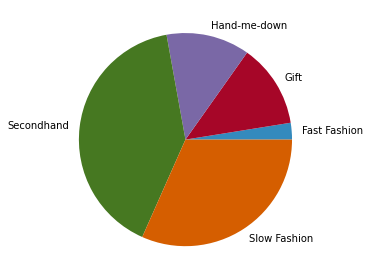

In [6]:
source_count.plot(kind='pie', y='Item', legend=None)
plt.ylabel('')
plt.tight_layout()
plt.savefig('../Assets/Images/acquisitiontypes.png')
plt.show()

## Average Cost per Wear by Category

In [7]:
cpw_category = wardrobe_df[['Type', 'Category', 'Cost per Wear']].groupby('Category').mean()
cpw_category = cpw_category
cpw_category

,Cost per Wear
Category,
blazer,6.473333
boots,12.017881
cardigan,4.658929
coat/jacket,4.074284
flats,13.995671
heels,7.500000
jeans,1.839804
leggings,4.805836
pants,7.171043


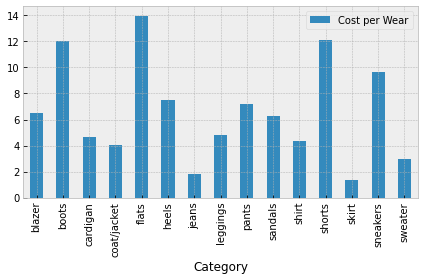

In [8]:
cpw_category.plot(kind='bar')
plt.tight_layout()
plt.savefig('../Assets/Images/cpwcatbar.png')
plt.show()

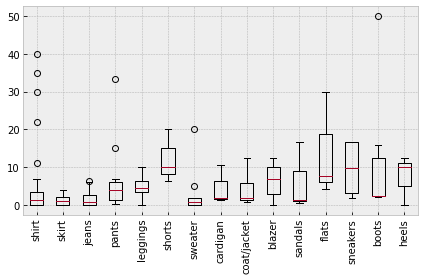

In [9]:
# Same date but in a boxplot
types = wardrobe_df['Category'].unique()
plt.boxplot([wardrobe_df['Cost per Wear'].loc[wardrobe_df['Category'] == cat] for cat in types])
plt.xticks(range(1, (len(types) + 1)), types, rotation='vertical')
plt.tight_layout()
plt.savefig('../Assets/Images/cpwcatbox.png')
plt.show()

## Average Wears per Month by Category

In [10]:
wpm_category = wardrobe_df[['Type', 'Category', 'Wears per Month']].groupby('Category').mean()
wpm_category

,Wears per Month
Category,
blazer,0.595092
boots,1.589110
cardigan,1.922418
coat/jacket,1.258899
flats,1.541484
heels,0.075643
jeans,2.052793
leggings,0.520911
pants,1.783320


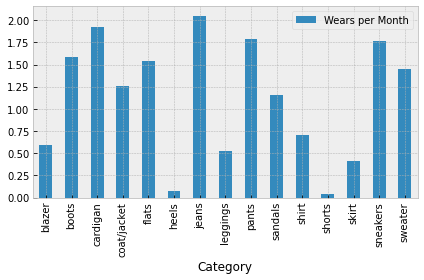

In [11]:
wpm_category.plot(kind='bar')
plt.tight_layout()
plt.savefig('../Assets/Images/wpmcatbar.png')
plt.show()

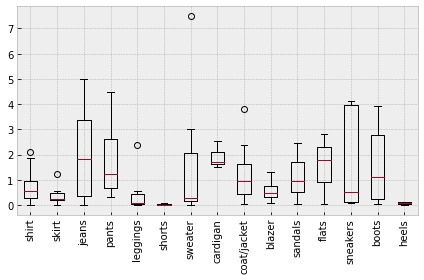

In [12]:
# Same date but in a boxplot
types = wardrobe_df['Category'].unique()
plt.boxplot([wardrobe_df['Wears per Month'].loc[wardrobe_df['Category'] == cat] for cat in types])
plt.xticks(range(1, (len(types) + 1)), types, rotation='vertical')
plt.tight_layout()
plt.savefig('../Assets/Images/wpmcatbox.png')
plt.show()

## Average Wears per Month by Category (line graphs)

In [13]:
# Edit column names so that they are dates only 

# Determine columns that include wear counts
wear_cols = []
for col_name in wardrobe_df.columns:
    if 'Wears (' in col_name:
        wear_cols.append(col_name)

# Pull out columns of interest
month_df = wardrobe_df[['Type', 'Category', 'Subcategory - Sleeves', *wear_cols]]

# Pull dates from column names
date_cols = []
for col_name in wear_cols:
    name_1 = col_name.replace('Wears (', '')
    name_2 = name_1.replace(')', '')
    date_cols.append(name_2)

# Replace names in dataframe
month_df = month_df.rename(columns=dict(zip(wear_cols, date_cols)))
month_df.head()

,Type,Category,Subcategory - Sleeves,10/2020,9/2020,8/2020,7/2020,6/2020,5/2020,4/2020,...,10/2019,9/2019,8/2019,7/2019,6/2019,5/2019,4/2019,3/2019,2/2019,1/2019
0,Tops,shirt,long sleeve,2.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Tops,shirt,long sleeve,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,Tops,shirt,long sleeve,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Tops,shirt,long sleeve,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tops,shirt,long sleeve,1.0,0.0,1.0,1.0,0.0,2.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0


In [14]:
# Plot sum of wears per month by category as line graph for tops
tops = month_df.loc[month_df['Type']=='Tops'].groupby(['Subcategory - Sleeves']).sum()
tops = tops.transpose()
tops.index = pd.to_datetime(tops.index,format='%m/%Y')
tops_months = tops.groupby(by=tops.index.month).mean()

tops_list = tops_months.columns.tolist()

tops_months

Subcategory - Sleeves,long sleeve,mid sleeve,short sleeve,sleeveless
1,10.5,6.5,6.5,6.0
2,11.5,3.5,6.0,4.5
3,4.5,5.0,4.5,7.0
4,6.0,2.5,1.0,6.0
5,3.0,2.0,7.0,8.0
6,2.0,3.0,7.0,4.5
7,0.5,3.0,11.0,5.0
8,4.5,3.0,6.0,6.0
9,6.0,4.0,6.0,8.0
10,10.0,3.5,4.5,12.0


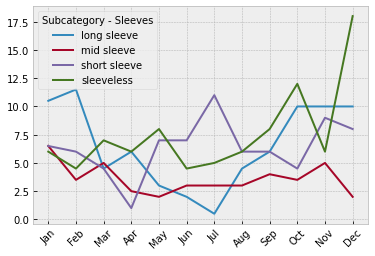

In [15]:
# Plot this on a line graph 
tops_index = tops_months.index
months_list = tops_index.tolist()

tops_months.plot(kind='line', rot=45)
plt.xticks(months_list, [calendar.month_abbr[m] for m in months_list])
plt.show()

In [16]:
# Plot sum of wears per month by category as line graph for bottoms
bottoms = month_df.loc[month_df['Type']=='Bottoms'].groupby(['Category']).sum()
bottoms = bottoms.transpose()
bottoms.index = pd.to_datetime(bottoms.index,format='%m/%Y')
bottoms_months = bottoms.groupby(by=bottoms.index.month).mean()

bottoms_list = bottoms_months.columns.tolist()

bottoms_months

Category,jeans,leggings,pants,shorts,skirt
1,20.0,6.0,7.5,0.0,1.5
2,23.0,5.5,3.5,0.0,1.0
3,18.5,1.0,3.5,0.0,3.5
4,9.0,7.0,2.5,0.0,2.0
5,9.5,2.0,8.5,1.5,2.5
6,11.0,0.5,4.0,0.0,1.0
7,8.0,0.5,5.0,0.0,5.0
8,9.5,1.0,10.5,1.5,3.5
9,9.0,3.0,9.5,0.0,4.5
10,19.0,3.5,6.0,0.0,2.0


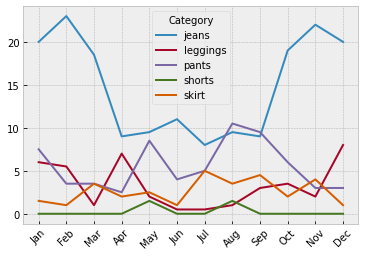

In [17]:
# Plot this on a line graph 
bottoms_index = bottoms_months.index
months_list = bottoms_index.tolist()

bottoms_months.plot(kind='line', rot=45)
plt.xticks(months_list, [calendar.month_abbr[m] for m in months_list])
plt.show()

In [18]:
# Plot sum of wears per month by category as line graph for outerwear
outerwear = month_df.loc[month_df['Type']=='Outerwear'].groupby(['Category']).sum()
outerwear = outerwear.transpose()
outerwear.index = pd.to_datetime(outerwear.index,format='%m/%Y')
outerwear_months = outerwear.groupby(by=outerwear.index.month).mean()

outerwear_list = outerwear_months.columns.tolist()

outerwear_months

Category,blazer,cardigan,coat/jacket,sweater
1,3.0,4.0,25.5,10.0
2,2.5,4.0,24.0,7.0
3,0.5,2.5,16.0,11.0
4,2.0,1.0,1.5,4.5
5,0.5,1.5,1.0,2.0
6,0.0,0.5,1.0,0.5
7,0.5,1.0,0.0,1.0
8,1.0,1.0,0.0,1.0
9,0.0,2.0,3.0,6.0
10,1.0,1.5,4.0,14.5


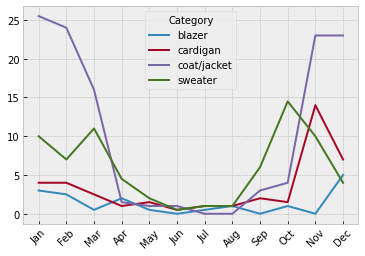

In [19]:
# Plot this on a line graph 
outerwear_index = outerwear_months.index
months_list = outerwear_index.tolist()

outerwear_months.plot(kind='line', rot=45)
plt.xticks(months_list, [calendar.month_abbr[m] for m in months_list])
plt.show()

In [20]:
# Plot sum of wears per month by category as line graph for shoes
shoes = month_df.loc[month_df['Type']=='Shoes'].groupby(['Category']).sum()
shoes = shoes.transpose()
shoes.index = pd.to_datetime(shoes.index,format='%m/%Y')
shoes_months = shoes.groupby(by=shoes.index.month).mean()

shoes_list = shoes_months.columns.tolist()

shoes_months

Category,boots,flats,heels,sandals,sneakers
1,30.0,0.0,0.0,1.0,4.0
2,24.5,0.0,0.5,2.5,3.5
3,9.5,4.5,0.0,1.5,5.0
4,3.5,3.0,1.0,5.5,2.0
5,0.5,3.5,2.0,8.0,6.5
6,0.5,1.5,0.5,6.0,2.0
7,0.0,2.0,0.0,7.5,4.5
8,6.0,3.0,0.0,6.5,3.5
9,8.5,1.0,1.0,5.0,2.5
10,16.5,0.0,0.0,2.0,6.5


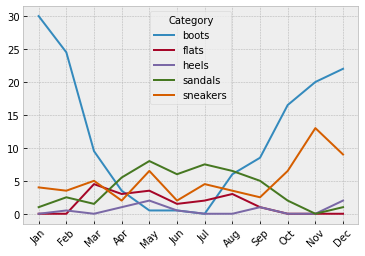

In [21]:
# Plot this on a line graph 
shoes_index = shoes_months.index
months_list = shoes_index.tolist()

shoes_months.plot(kind='line', rot=45)
plt.xticks(months_list, [calendar.month_abbr[m] for m in months_list])
plt.show()

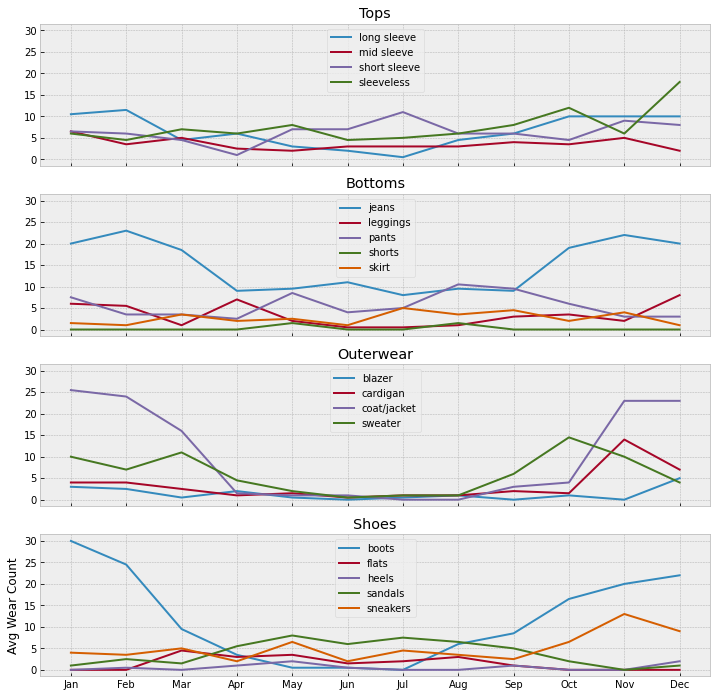

In [22]:
# Put all four line graphs together using plt.subplot
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(4, sharex= True, sharey=True, figsize=(12,12))

for t in tops_list:
    ax1.plot(tops_index, tops_months[t], label=t)
ax1.set_xticks(months_list)
ax1.set_xticklabels([calendar.month_abbr[m] for m in months_list])
ax1.set_title('Tops')
ax1.legend(loc='upper center')
plt.ylabel('Avg Wear Count')

for b in bottoms_list:
    ax2.plot(bottoms_index, bottoms_months[b], label=b)

ax2.set_title('Bottoms')
ax2.legend(loc='upper center')

for o in outerwear_list:
    ax3.plot(outerwear_index, outerwear_months[o], label=o)
ax3.set_title('Outerwear')
ax3.legend(loc='upper center')

for s in shoes_list:
    ax4.plot(shoes_index, shoes_months[s], label=s)
ax4.set_title('Shoes')
ax4.legend(loc='upper center')

plt.tight_layout
plt.savefig('../Assets/Images/wpmmonthline.png')
plt.show()